In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('titanic_toy.csv')

In [4]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [5]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [17]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [19]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_95'] = X_train['Fare'].fillna(95)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [20]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after 99 wala imputation: ', X_train['Age_99'].var())
print('Age Variance after -1 wala imputation: ', X_train['Age_minus1'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after 95 wala imputation: ', X_train['Fare_95'].var())
print('Fare Variance after -1 wala imputation: ', X_train['Fare_minus1'].var())

Original Age variable variance:  204.34951339046142
Age Variance after 99 wala imputation:  951.7275570187188
Age Variance after -1 wala imputation:  318.0896202624488
Original Fare variable variance:  2448.1979137063163
Fare Variance after 95 wala imputation:  2511.3169932373185
Fare Variance after -1 wala imputation:  2378.5676784883494


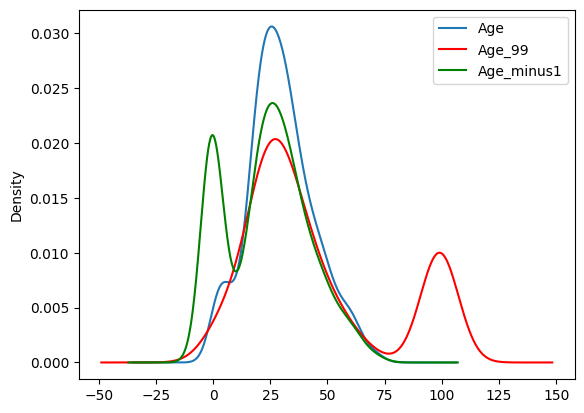

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

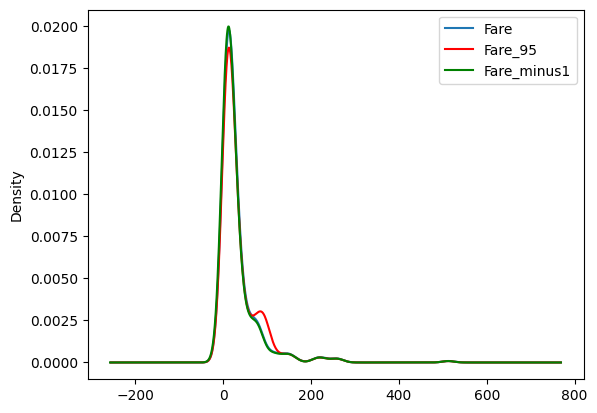

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_95'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [24]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_95,Fare_minus1
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,72.870523,63.321188
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,16.071554,16.553989
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-100.616369,-94.317400
Age_minus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,128.120772,114.394141
Fare_95,72.870523,2448.197914,16.071554,-100.616369,128.120772,2511.316993,2223.422780
Fare_minus1,63.321188,2448.197914,16.553989,-94.317400,114.394141,2223.422780,2378.567678


In [25]:
X_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_95,Fare_minus1
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.095420,0.084585
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,0.193914,0.205233
Age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,-0.065082,-0.062687
Age_minus1,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.143349,0.131514
Fare_95,0.095420,1.000000,0.193914,-0.065082,0.143349,1.000000,0.909732
Fare_minus1,0.084585,1.000000,0.205233,-0.062687,0.131514,0.909732,1.000000


### Using Sklearn

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [27]:
imputer1 = SimpleImputer(strategy='constant',fill_value=99)
imputer2 = SimpleImputer(strategy='constant',fill_value=95)

In [28]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [29]:
trf.fit(X_train)

C:\Users\Ratnesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=95,
                                               strategy='constant'),
                                 ['Fare'])])

In [30]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [31]:
trf.named_transformers_['imputer2'].statistics_

array([95.])

In [32]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [33]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]])